<a href="https://colab.research.google.com/github/Jaseem1911/DataPreprocessing/blob/main/BeerServing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# taking data from a url

url = 'https://bit.ly/drinksbycountry'

In [ ]:
# convert data into tabular format
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [ ]:
# for columnwise
pd.read_table(url, sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [ ]:
# loading data from other folder 
data=pd.read_csv('/content/drive/MyDrive/beer-servings.csv')

In [ ]:
# problem because back slashes. It can change manually or 
# data =pd.read_csv('C:\Users\maite\Desktop/car_crashes.csv')

#or
# data=pd.read_csv(r'C:\Users\maite\Desktop/car_crashes.csv')


In [ ]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
# check the data .We can see an additional column will present in the table.
# python default give an index to the dataset to solve process
# data.drop('Unnamed:0,inplace=True,axis=1)
# or

data=pd.read_csv(r'/content/drive/MyDrive/beer-servings.csv', index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
data.shape

(193, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [ ]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [ ]:
# to handle the missing values

# // filling missing values

# check the datatypes of the columns
data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

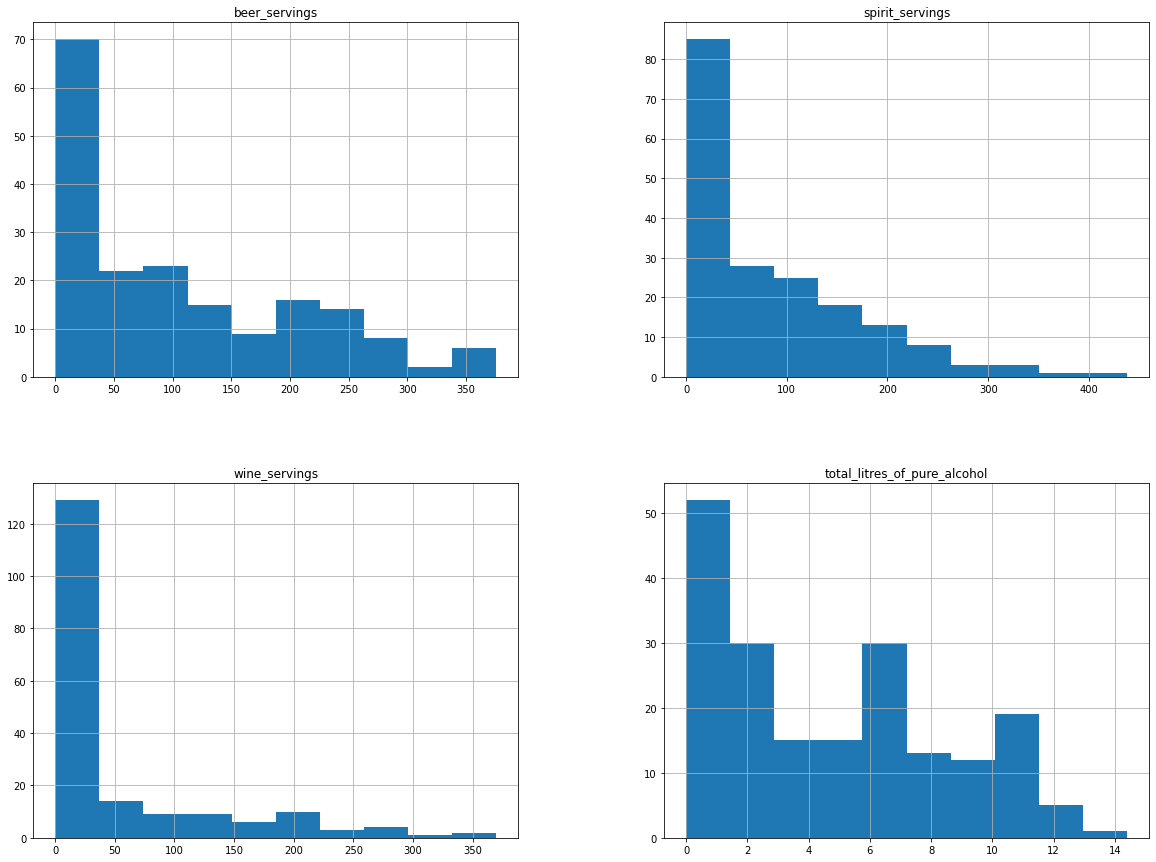

In [ ]:
dgraph=data.select_dtypes(include=['float'])
dgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
data['beer_servings']=data['beer_servings'].fillna(data['beer_servings'].median())
# check for the null value
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [ ]:
for i in ['spirit_servings','wine_servings','total_litres_of_pure_alcohol']:
 data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [ ]:
# take the mean on beer servings with respect to different continents
data.groupby('continent')['beer_servings'].mean()

continent
Africa            61.471698
Asia              40.613636
Europe           190.822222
North America    145.434783
Oceania           89.687500
South America    137.000000
Name: beer_servings, dtype: float64

In [ ]:
# check the number of unique values present in the country column
data.country.nunique()

193

In [ ]:
data.drop('country',axis=1,inplace=True)

In [ ]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


Text(0.5, 1.0, 'Box plot of beer servings')

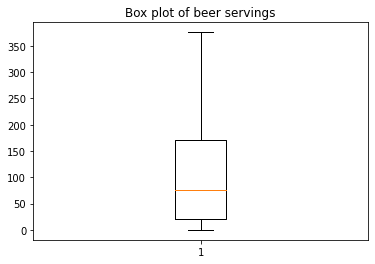

In [ ]:
# outliers in beer_servings column
plt.boxplot(data['beer_servings'])
plt.title('Box plot of beer servings')
# no outliers

Text(0.5, 1.0, 'Box plot of beer servings')

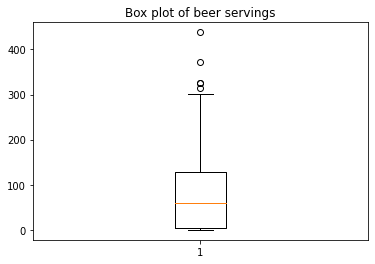

In [ ]:
plt.boxplot(data['spirit_servings'])
plt.title('Box plot of beer servings')
# here outliers are presented in this column.we use the inter quartile range to manage the outliers

In [ ]:
q1=np.percentile(data['spirit_servings'],25,interpolation='midpoint')
q2=np.percentile(data['spirit_servings'],50,interpolation='midpoint')
q3=np.percentile(data['spirit_servings'],75,interpolation='midpoint')

print(q1)
print(q2)
print(q3)

5.0
60.0
128.0


In [ ]:
data['spirit_servings'].median()

60.0

In [ ]:

# inter quartile range

iqr=q3-q1
# from iqr we can find the lower limit and the upper limit and we remove the value below
# the lower limit and above the upper limit.for that
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr
print(low_limit)
print(up_limit)

-179.5
312.5


In [ ]:
# remove the value below -179.5 and above 312.5
# for that

outlier=[]
for x in data['spirit_servings']:
  if((x>up_limit)or(x<low_limit)):
    outlier.append(x)
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [ ]:
# find the index of outliers
ind1=data['spirit_servings']>up_limit
data.loc[ind1].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [ ]:
# drop these index
data.drop([15,68,73,141,144],inplace=True)


Text(0.5, 1.0, 'Box plot of beer servings')

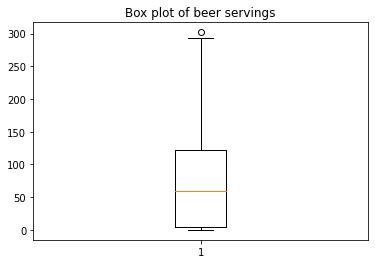

In [ ]:
# plot the spirit_serving column again
plt.boxplot(data['spirit_servings'])
plt.title('Box plot of beer servings')

Text(0.5, 1.0, 'Box plot of wine servings')

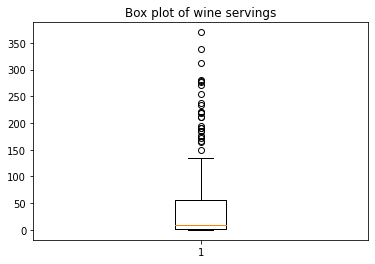

In [ ]:
# check the outliers in wine_serving column
plt.boxplot(data['wine_servings'])
plt.title('Box plot of wine servings')

In [ ]:
# there is an outliers in wine_serving column
q1=np.percentile(data['wine_servings'],25,interpolation='midpoint')
q1=np.percentile(data['wine_servings'],50,interpolation='midpoint')
q1=np.percentile(data['wine_servings'],75,interpolation='midpoint')
iqr=q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr
print(low_limit)
print(up_limit)

-48.25
233.75


In [ ]:
outlier=[]
for x in data['wine_servings']:
  if((x>up_limit)or(x<low_limit)):
    outlier.append(x)

In [ ]:
outlier

[312.0, 254.0, 278.0, 370.0, 237.0, 271.0, 339.0, 276.0, 280.0]

In [ ]:
ind1= data['wine_servings']>up_limit
data.loc[ind1].index

Int64Index([3, 42, 48, 61, 83, 99, 136, 156, 166], dtype='int64')

In [ ]:
data.drop([3,42,48,61,83,99,136,156,166],inplace=True)

Text(0.5, 1.0, 'Box plot of beer servings')

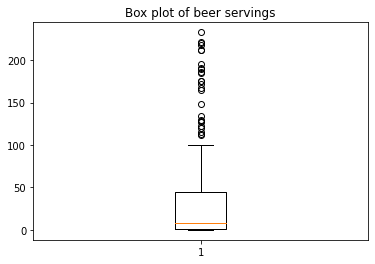

In [ ]:
# plot the wine_serving column again 
plt.boxplot(data['wine_servings'])
plt.title('Box plot of beer servings')

Text(0.5, 1.0, 'Box plot of toatal_litres_of_pure_alcohol')

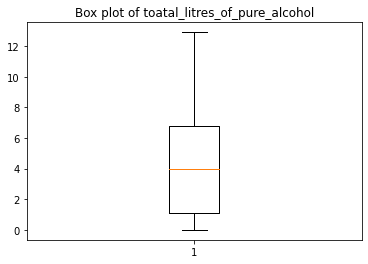

In [ ]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('Box plot of toatal_litres_of_pure_alcohol')

In [ ]:
data.shape

(179, 5)

In [ ]:
data.continent.nunique()

6

In [ ]:
data=pd.get_dummies(data)
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,89.0,132.0,54.0,4.9,0,0,1,0,0,0
2,25.0,0.0,14.0,0.7,1,0,0,0,0,0
4,217.0,57.0,45.0,5.9,1,0,0,0,0,0
5,102.0,128.0,45.0,4.9,0,0,0,1,0,0


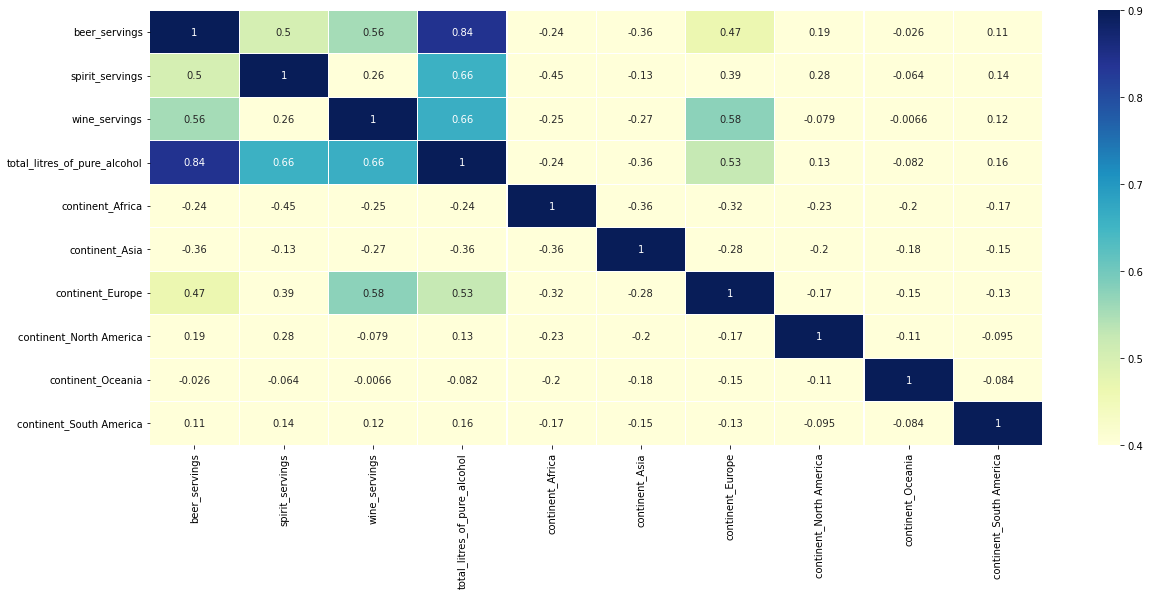

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

In [ ]:
# split the dataset and create the model
data.columns
y=data['total_litres_of_pure_alcohol']
X=data.drop('total_litres_of_pure_alcohol',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42, test_size=0.2)

In [ ]:
# create linear model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)

In [ ]:
# check the mse
from sklearn.metrics import mean_squared_error
print('MSE IS:',mean_squared_error(y_test,prediction))

MSE IS: 2.844865510182145


In [ ]:
# r2 ed value
from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test,prediction))

R squared value is: 0.7798102230479408


In [ ]:
# feature scaling
# standard scaling
# scaling is done on features
X.describe()
# type of x

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,97.765363,74.050279,36.888268,0.296089,0.240223,0.195531,0.111732,0.089385,0.067039
std,97.790310,77.034741,59.988377,0.457811,0.428417,0.397721,0.315920,0.286100,0.250791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150.500000,120.000000,45.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,233.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
from sklearn import preprocessing
standards=preprocessing.StandardScaler()
X=standards.fit_transform(X)

In [ ]:
X.describe()
# here we get an error because the dataframe is converted into numpy array.we want to convert it into dataframe

AttributeError: ignored

In [ ]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8
count,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,179.000000
mean,3.225229e-17,-9.923781e-18,2.977134e-17,3.969512e-17,2.232851e-17,7.442836e-17,2.977134e-17,-1.984756e-17,0.000000
std,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805
min,-1.002549e+00,-9.639546e-01,-6.166485e-01,-6.485637e-01,-5.622957e-01,-4.930066e-01,-3.546635e-01,-3.133042e-01,-0.268060
25%,-7.974563e-01,-9.183931e-01,-5.999318e-01,-6.485637e-01,-5.622957e-01,-4.930066e-01,-3.546635e-01,-3.133042e-01,-0.268060
50%,-3.462519e-01,-2.219532e-01,-4.829152e-01,-6.485637e-01,-5.622957e-01,-4.930066e-01,-3.546635e-01,-3.133042e-01,-0.268060
75%,5.407751e-01,5.981537e-01,1.356010e-01,1.541869e+00,-5.622957e-01,-4.930066e-01,-3.546635e-01,-3.133042e-01,-0.268060
max,2.853198e+00,2.967351e+00,3.278332e+00,1.541869e+00,1.778424e+00,2.028370e+00,2.819574e+00,3.191786e+00,3.730505


In [ ]:
# again create a linear regression model 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE IS:',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,prediction))
# standard scaler not done any effect on the dataset

MSE IS: 2.844865510182158
R squared value is : 0.7798102230479398


In [ ]:
# min-max scaling
# we change the feature set x by standard scaling .again take x from the dataset
X=data.drop('total_litres_of_pure_alcohol',axis=1)
X.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,97.765363,74.050279,36.888268,0.296089,0.240223,0.195531,0.111732,0.089385,0.067039
std,97.790310,77.034741,59.988377,0.457811,0.428417,0.397721,0.315920,0.286100,0.250791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150.500000,120.000000,45.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,233.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
min_max =preprocessing.MinMaxScaler(feature_range=(0,1))
# apply this scaling to x 
X=min_max.fit_transform(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.260014,0.245200,0.158319,0.296089,0.240223,0.195531,0.111732,0.089385,0.067039
std,0.260081,0.255082,0.257461,0.457811,0.428417,0.397721,0.315920,0.286100,0.250791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.053191,0.011589,0.004292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.170213,0.188742,0.034335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.400266,0.397351,0.193133,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# again create a linear regression model 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE IS:',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,prediction))
# minmax scaler not done any effect on the dataset

MSE IS: 2.844865510182158
R squared value is : 0.7798102230479398


In [ ]:
# normalization
# normalization is also done in the feature set.so again load the feature set x 
X=data.drop('total_litres_of_pure_alcohol',axis=1)
X.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,97.765363,74.050279,36.888268,0.296089,0.240223,0.195531,0.111732,0.089385,0.067039
std,97.790310,77.034741,59.988377,0.457811,0.428417,0.397721,0.315920,0.286100,0.250791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150.500000,120.000000,45.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,233.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X=preprocessing.normalize(X)

In [ ]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.647911,0.458174,0.192205,0.028861,0.042303,0.011957,0.000629,0.006765,0.000338
std,0.314538,0.333732,0.234069,0.132500,0.181755,0.105344,0.001995,0.074808,0.001346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.423247,0.157006,0.023060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.748131,0.428658,0.091555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.928609,0.761876,0.305513,0.006483,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.999961,0.996860,0.940272,1.000000,1.000000,1.000000,0.011570,1.000000,0.009300


In [ ]:
# again create a linear regression model 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE IS:',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,prediction))
# we get negative in r2ed value.so the normalization is not good for this dataset.
# it is good to be use in classification algorithm

MSE IS: 9.544402524972577
R squared value is : 0.26127268386060654


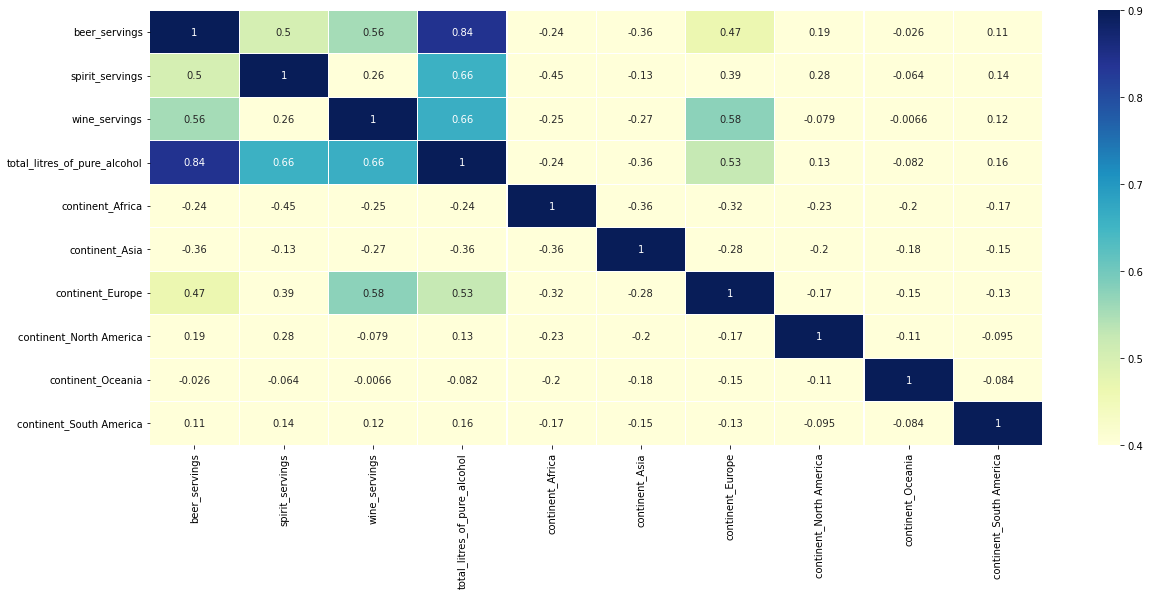

In [ ]:
# feature reduction
# and check the model is improving
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

In [ ]:
# here the spirit_serving column and the wine_serving column has high correlation with the beer_serving column
# we can remove those two columns
data.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [ ]:
# drop the column with high correlation 
data.drop(['spirit_servings','wine_servings'],axis=1,inplace=True)

In [ ]:
# again create a linear regression model 
y=data['total_litres_of_pure_alcohol']
X=data.drop('total_litres_of_pure_alcohol',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE IS:',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,prediction))

MSE IS: 4.249682932762041
R squared value is : 0.671078743886935


In [ ]:
# MERGING
df1=pd.DataFrame({'Anu':[80,95,65,32,105],
                  'manju':[87,45,12,64,45],
                  'abcd':[36,44,56,91,50]},
                 index=[2009,2010,2011,2012,2013])

In [ ]:
df2=pd.DataFrame({'Anu':[80,95,65,32,105],
                  'abc':[36,44,56,91,50],
                  'xyz':[87,45,12,64,45]},
                 index=[2005,2006,2007,2008,2009])

In [ ]:
pd.merge(df1,df2,on='Anu')

,Anu,manju,abcd,abc,xyz
0,80,87,36,36,87
1,95,45,44,44,45
2,65,12,56,56,12
3,32,64,91,91,64
4,105,45,50,50,45


In [ ]:
# JOINING
df3=pd.DataFrame({'Anu':[80,95,65,32,105],
                  'def':[87,45,12,64,45],
                  'ghi':[36,44,56,91,50]})


In [ ]:
df4=pd.DataFrame({'klm':[45,23,65,12,100],
                  'abc':[88,56,78,96,20],
                  'xyz':[12,56,78,95,111]})

In [ ]:
join_data=df3.join(df4)

In [ ]:
join_data

,Anu,def,ghi,klm,abc,xyz
0,80,87,36,45,88,12
1,95,45,44,23,56,56
2,65,12,56,65,78,78
3,32,64,91,12,96,95
4,105,45,50,100,20,111


In [ ]:
# CONCATENATION
df5=pd.DataFrame({'Anu':[12,45,63,12,78],
                  'uvw':[63,13,45,78,65],
                  'qrs':[78,95,65,45,14]})

In [ ]:
cancat_data=pd.concat([df4,df5],axis=1)

In [ ]:
cancat_data

,klm,abc,xyz,Anu,uvw,qrs
0,45,88,12,12,63,78
1,23,56,56,45,13,95
2,65,78,78,63,45,65
3,12,96,95,12,78,45
4,100,20,111,78,65,14
